In [1]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC, SVR
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRFRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor)

from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, PolynomialFeatures

from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV,
StratifiedKFold, learning_curve, cross_val_predict, cross_validate,
permutation_test_score, validation_curve, StratifiedKFold, RandomizedSearchCV)

from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report)

warnings.filterwarnings('ignore') 

In [10]:
#df = pd.read_csv('Digital Sales - Customer Data.csv', sep=';')
#df.head()

In [11]:
#df.to_csv('digital_sales-customer_data.csv', index=False)

In [2]:
df = pd.read_csv('digital_sales-customer_data.csv')

In [3]:
df.head()

,date,first_name,gender,product_name,category,price,quantity,revenue,customer_country,platform,marketing_channel,nps_score
0,7/14/2024,Colver,Male,Ultimate Planner Hub,Webinar,128,1,128,Portugal,ClickFunnels,Email,3
1,04/10/2025,Paolo,Male,Content Calendar Pro,E-book,32,5,160,Indonesia,Direct,Email,6
2,02/01/2025,Stacie,Female,Habit Tracker for Creators,Webinar,27,1,27,Guatemala,Kajabi,Organic Search,3
3,5/23/2025,Kaia,Female,Masterclass: Digital Marketing,Coaching Program,147,3,441,Brazil,Direct,YouTube,1
4,09/09/2024,Steven,Male,Habit Tracker for Creators,Course,88,1,88,Poland,Teachable,Affiliate,4


In [5]:
df['gender'].value_counts()

gender
Male           1361
Female         1320
Genderqueer      64
Genderfluid      57
Bigender         53
Non-binary       49
Polygender       49
Agender          47
Name: count, dtype: int64

In [6]:
df['product_name'].value_counts()

product_name
Content Calendar Pro                 329
Masterclass: Digital Marketing       314
Webinar: Launch Your First Course    313
Project Management Toolkit           303
Notion Second Brain                  301
Ultimate Planner Hub                 296
Financial Tracker                    292
Habit Tracker for Creators           286
AI Course for Beginners              284
Productivity Booster Pack            282
Name: count, dtype: int64

In [7]:
df['category'].value_counts()

category
Course              519
Template            511
Subscription        508
E-book              494
Webinar             485
Coaching Program    483
Name: count, dtype: int64

In [9]:
df['platform'].value_counts()

platform
Teachable       516
ClickFunnels    506
Kajabi          495
Gumroad         495
Direct          494
Shopify         494
Name: count, dtype: int64

In [10]:
df['marketing_channel'].value_counts()

marketing_channel
Affiliate         416
Paid Ads          383
Organic Search    381
Email             379
Instagram         378
TikTok            358
Facebook Ads      357
YouTube           348
Name: count, dtype: int64

In [11]:
df.drop(columns=['date','first_name'], inplace=True)

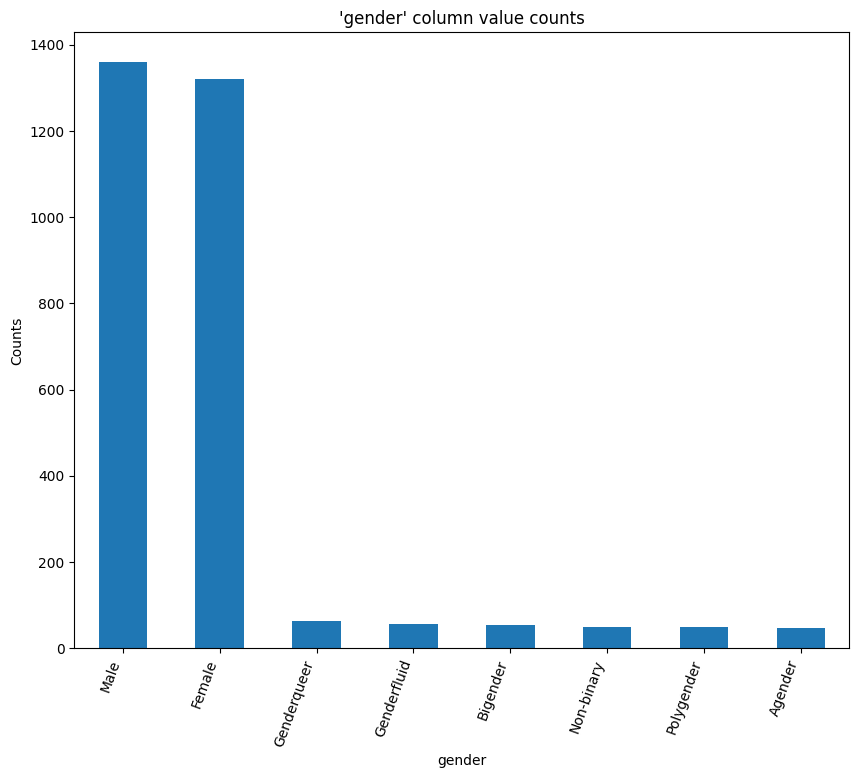

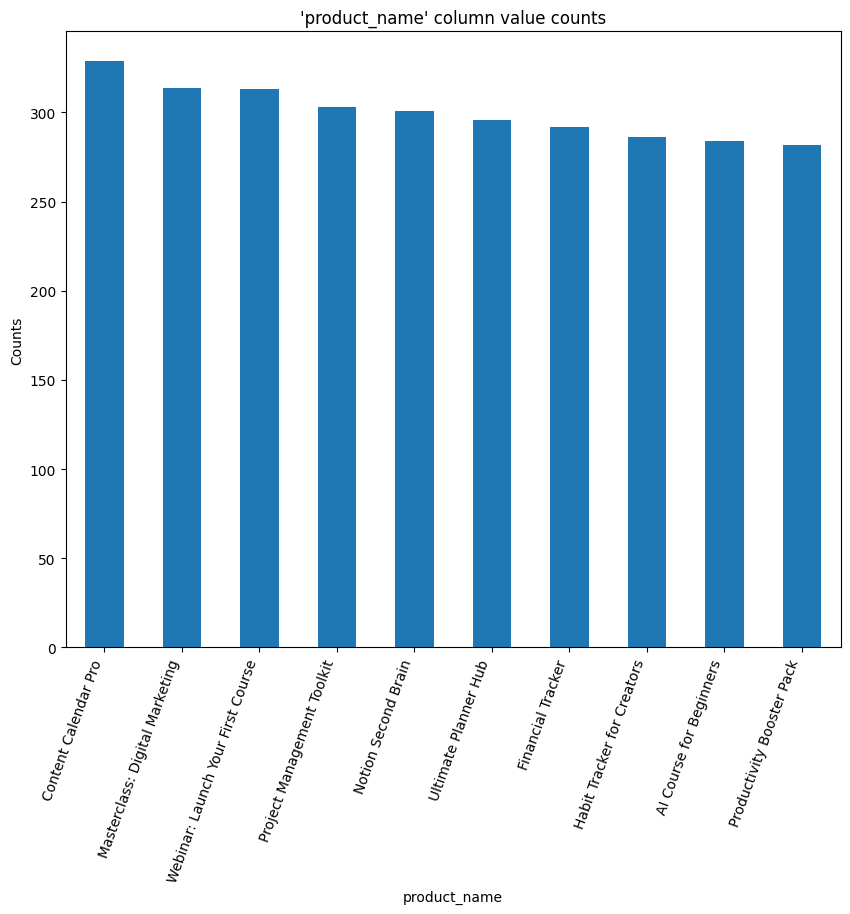

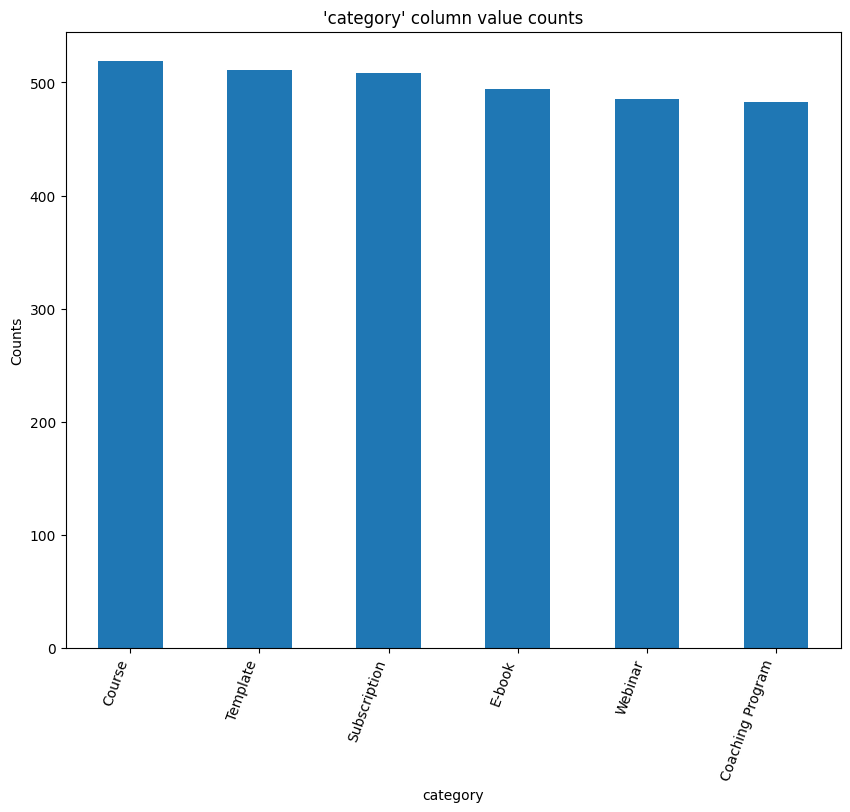

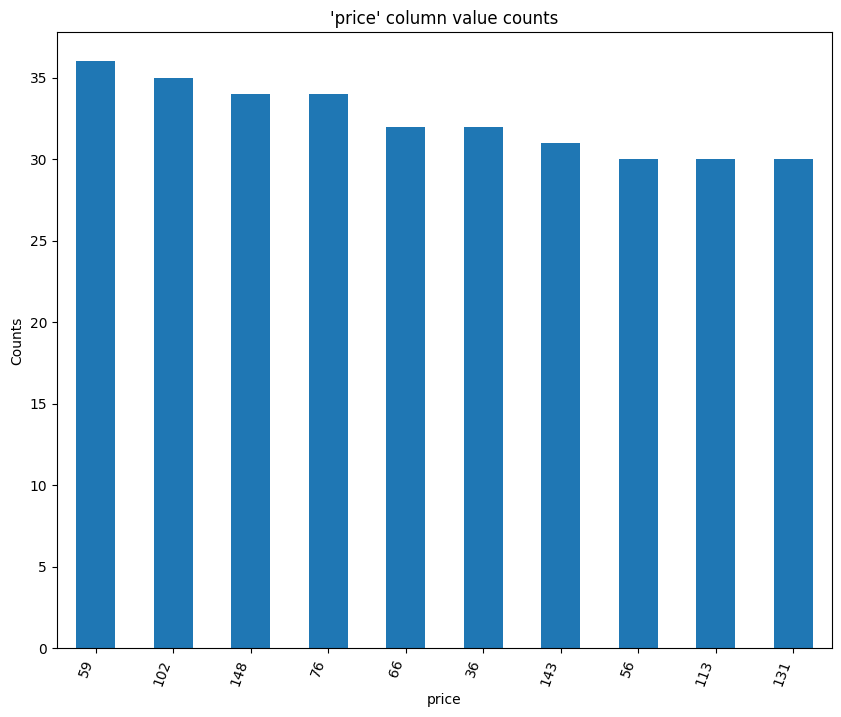

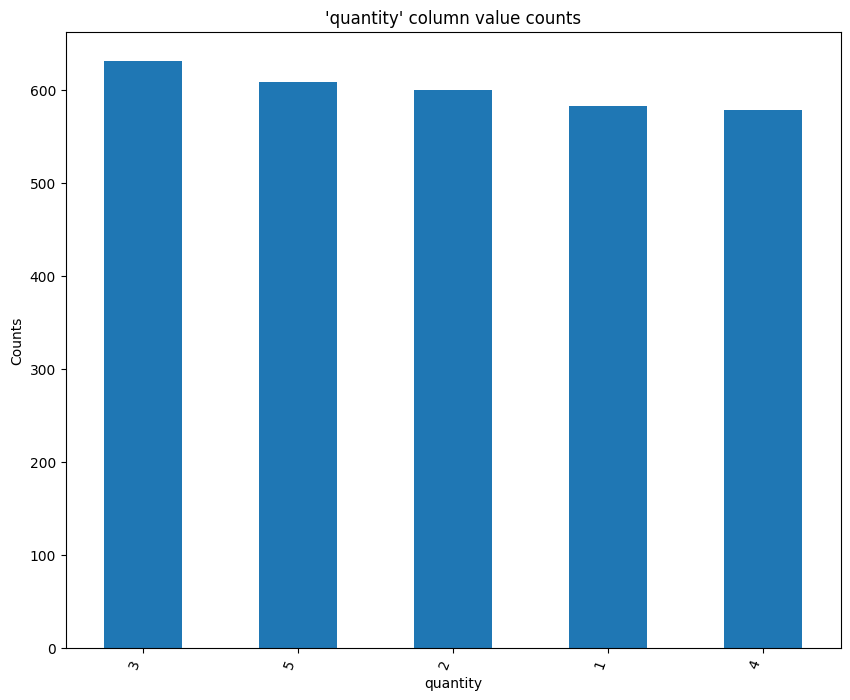

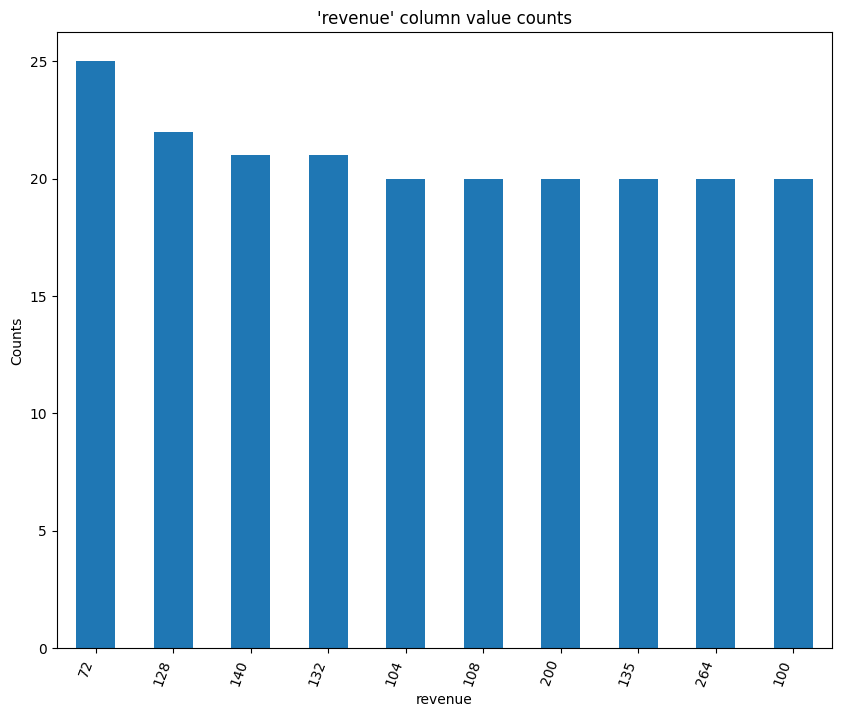

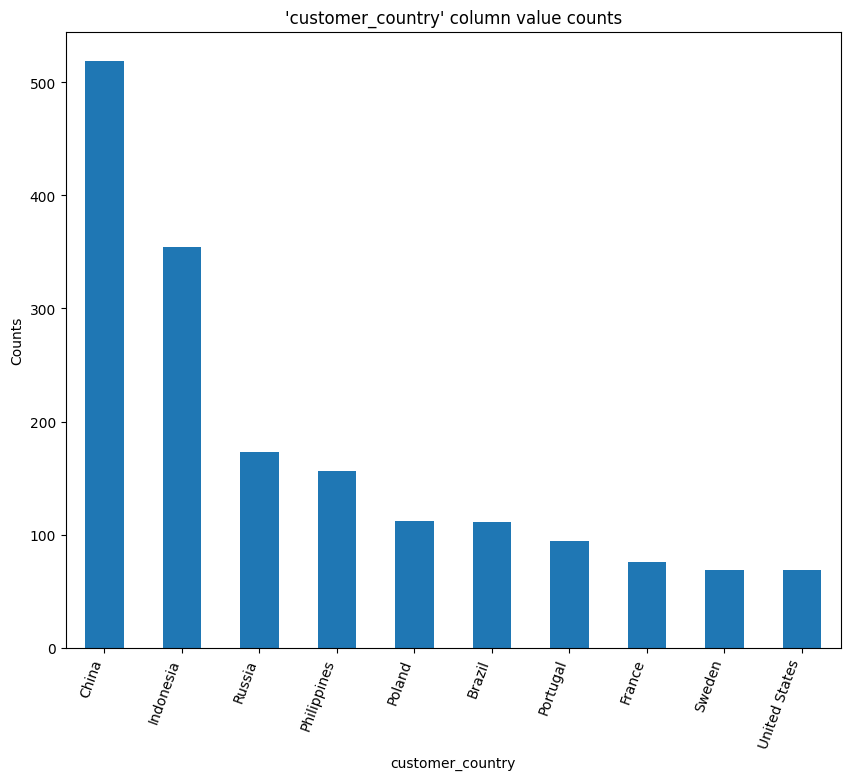

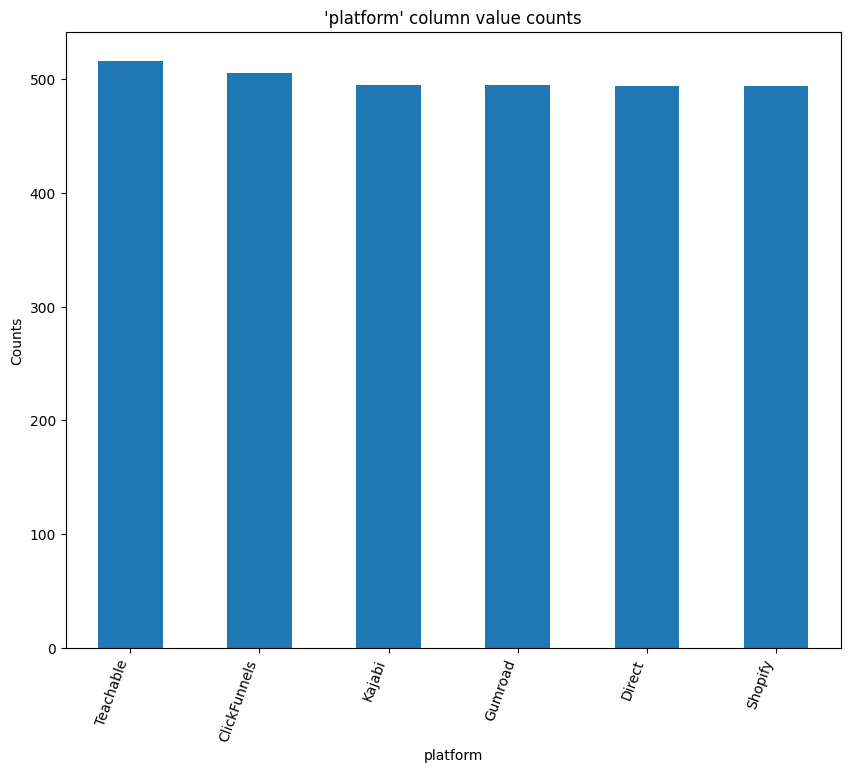

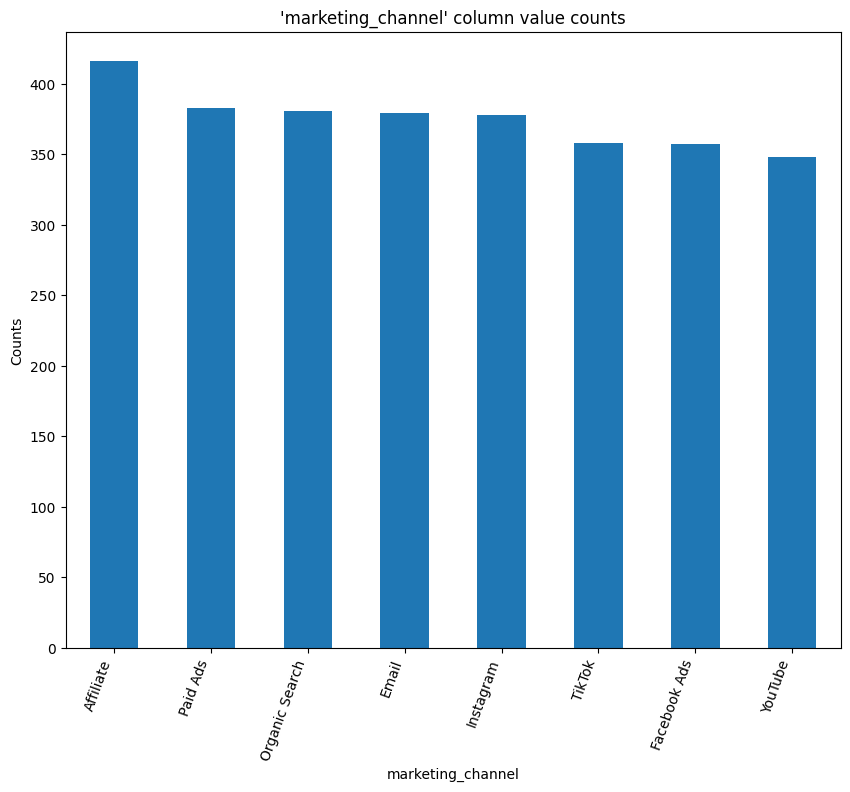

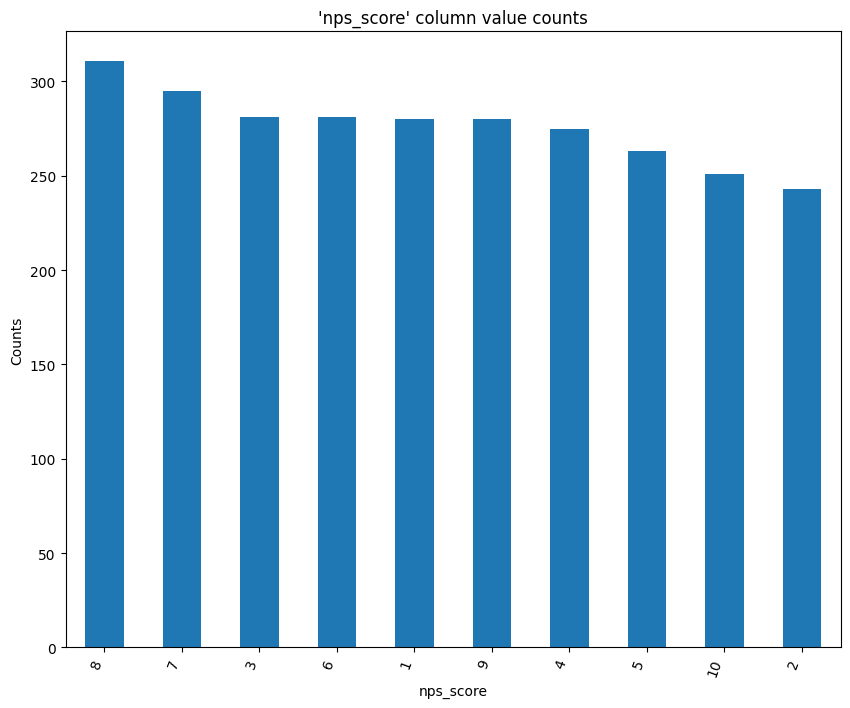

In [14]:
# Exploratory Data Analysis
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 8))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 70, ha='right')
    plt.show()

columns = df.columns

for column in columns:
    eda_plot(column)

In [28]:
df1 = df.copy()

In [31]:
df.isna().sum()

gender               0
product_name         0
category             0
price                0
quantity             0
revenue              0
customer_country     0
platform             0
marketing_channel    0
nps_score            0
dtype: int64

In [29]:
df.head()

,gender,product_name,category,price,quantity,revenue,customer_country,platform,marketing_channel,nps_score
0,Male,Ultimate Planner Hub,Webinar,128,1,128,Portugal,ClickFunnels,Email,3
1,Male,Content Calendar Pro,E-book,32,5,160,Indonesia,Direct,Email,6
2,Female,Habit Tracker for Creators,Webinar,27,1,27,Guatemala,Kajabi,Organic Search,3
3,Female,Masterclass: Digital Marketing,Coaching Program,147,3,441,Brazil,Direct,YouTube,1
4,Male,Habit Tracker for Creators,Course,88,1,88,Poland,Teachable,Affiliate,4


In [32]:
df.select_dtypes(include=['object', 'category'])

,gender,product_name,category,customer_country,platform,marketing_channel
0,Male,Ultimate Planner Hub,Webinar,Portugal,ClickFunnels,Email
1,Male,Content Calendar Pro,E-book,Indonesia,Direct,Email
2,Female,Habit Tracker for Creators,Webinar,Guatemala,Kajabi,Organic Search
3,Female,Masterclass: Digital Marketing,Coaching Program,Brazil,Direct,YouTube
4,Male,Habit Tracker for Creators,Course,Poland,Teachable,Affiliate
...,...,...,...,...,...,...
2995,Female,Ultimate Planner Hub,Template,Russia,Kajabi,Organic Search
2996,Female,Ultimate Planner Hub,Template,Cameroon,Shopify,Facebook Ads
2997,Female,Productivity Booster Pack,Template,Indonesia,Direct,Organic Search
2998,Female,Webinar: Launch Your First Course,Template,Democratic Republic of the Congo,Direct,Organic Search


In [34]:
# Option 2: Use a loop for multiple columns
categorical_cols = df.select_dtypes(include=['object', 'category'])
label_encoders = {} 

for col in categorical_cols: 
    le = LabelEncoder() 
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform

In [35]:
df.head()

,gender,product_name,category,price,quantity,revenue,customer_country,platform,marketing_channel,nps_score,gender_encoded,product_name_encoded,category_encoded,customer_country_encoded,platform_encoded,marketing_channel_encoded
0,Male,Ultimate Planner Hub,Webinar,128,1,128,Portugal,ClickFunnels,Email,3,5,8,5,129,0,1
1,Male,Content Calendar Pro,E-book,32,5,160,Indonesia,Direct,Email,6,5,1,2,70,1,1
2,Female,Habit Tracker for Creators,Webinar,27,1,27,Guatemala,Kajabi,Organic Search,3,2,3,5,64,3,4
3,Female,Masterclass: Digital Marketing,Coaching Program,147,3,441,Brazil,Direct,YouTube,1,2,4,0,20,1,7
4,Male,Habit Tracker for Creators,Course,88,1,88,Poland,Teachable,Affiliate,4,5,3,1,128,5,0


In [38]:
df.drop(columns=df.select_dtypes('object'), inplace=True)

In [42]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

print("Dataset shape:", X.shape, '\n')
print("Feature names:", X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset shape: (3000, 9) 

Feature names: Index(['quantity', 'revenue', 'nps_score', 'gender_encoded',
       'product_name_encoded', 'category_encoded', 'customer_country_encoded',
       'platform_encoded', 'marketing_channel_encoded'],
      dtype='object')


=== Linear Regression Tuning Examples ===

=== Feature Correlation Analysis ===


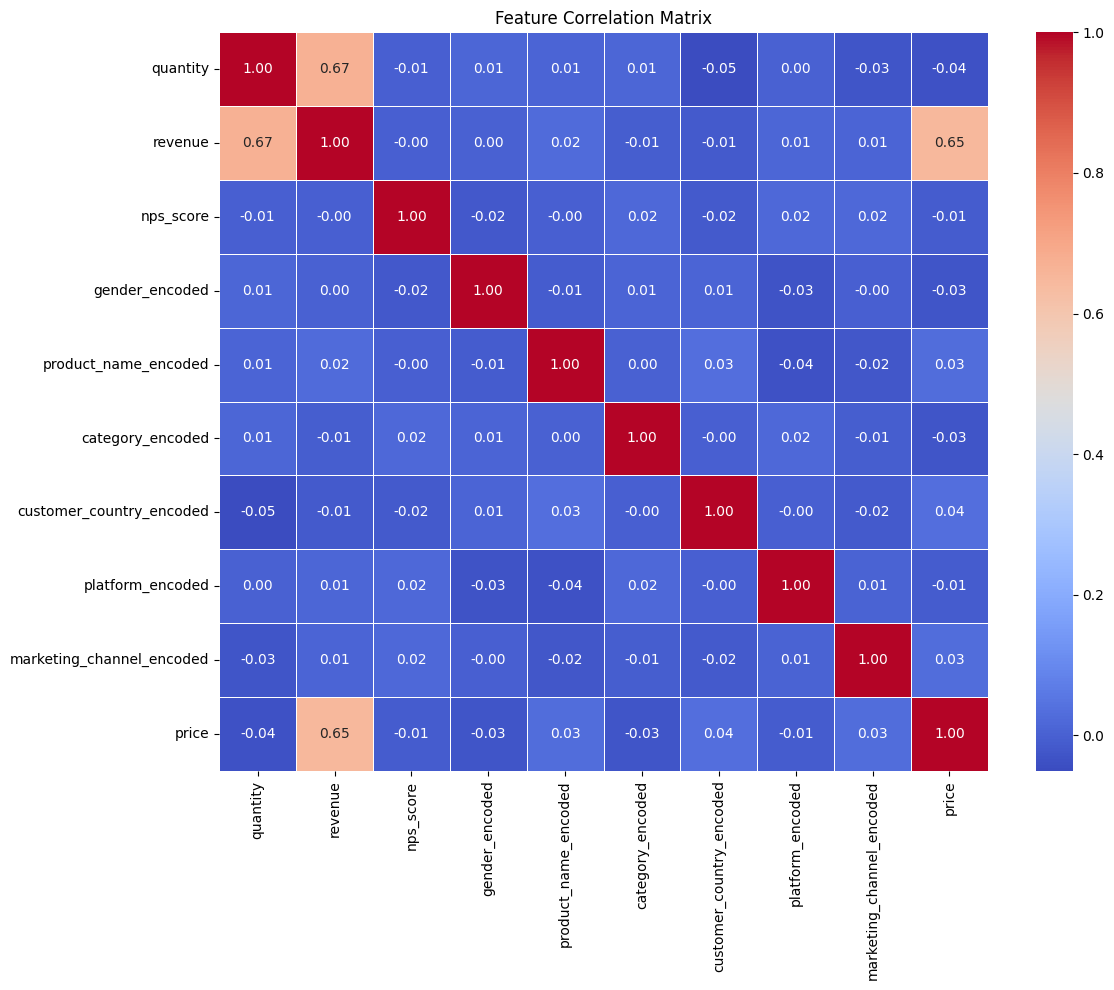

Feature correlation with target (price):
price                        1.000000
revenue                      0.650468
customer_country_encoded     0.035351
product_name_encoded         0.030460
marketing_channel_encoded    0.027843
platform_encoded            -0.009881
nps_score                   -0.011468
gender_encoded              -0.027127
category_encoded            -0.028140
quantity                    -0.035727
Name: price, dtype: float64

=== Cross-Validation ===
Cross-Validation MSE: 254.8699 ± 15.4370
Cross-Validation MAE: 11.9101 ± 0.4841
Cross-Validation R²:  0.8208 ±  0.0044

=== Basic Linear Regression ===
MSE test set: 255.1881
MSE train set: 252.4090

R² Score test: 0.8164
R² Score train: 0.8237

MAE test set: 12.0840
MAE train set: 11.7608

Coefficients: [-2.27336322e+01  2.73735451e-01  6.52773232e-02 -2.43505616e-01
 -4.16994491e-02 -2.08804327e-01  1.46399169e-02 -4.22462285e-01
 -9.32231193e-03]
Intercept: 84.9086752852554

Selected features: ['quantity' 'revenue' '

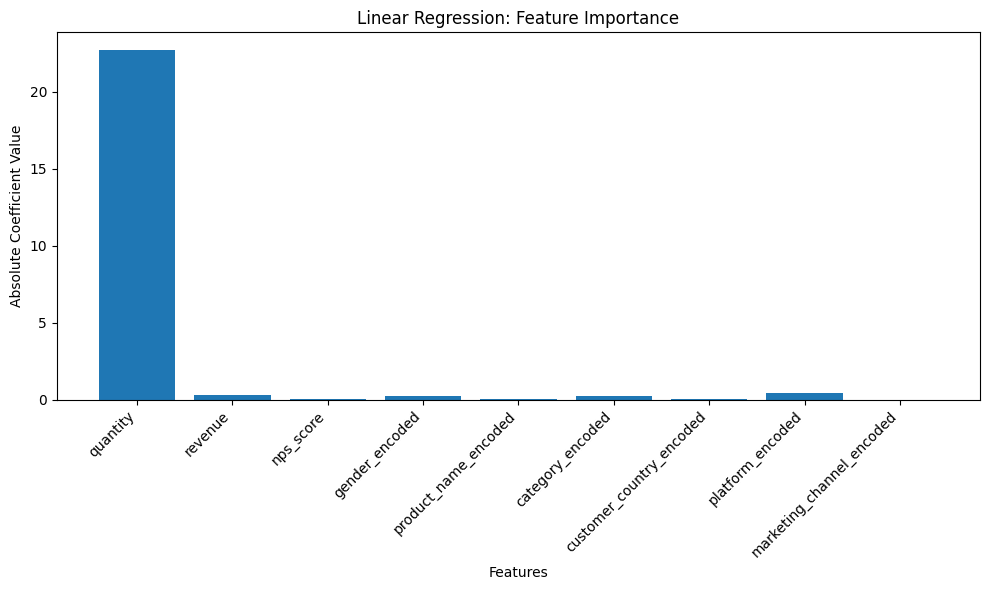

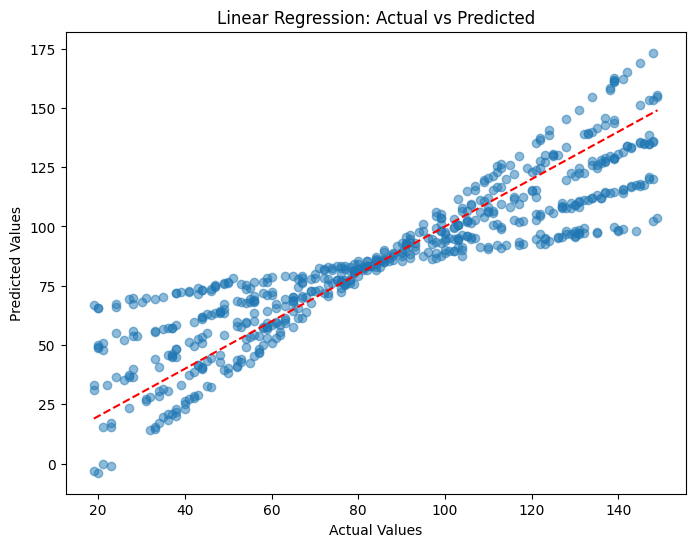


=== Scaled Linear Regression ===
MSE test set: 255.1881
MSE train set: 252.4090

R² Score test: 0.8164
R² Score train: 0.8237

MAE test set: 12.0840
MAE train set: 11.7608
Selected Features Coef_: ['quantity' 'revenue' 'nps_score' 'gender_encoded' 'product_name_encoded'
 'category_encoded' 'customer_country_encoded' 'platform_encoded'
 'marketing_channel_encoded']


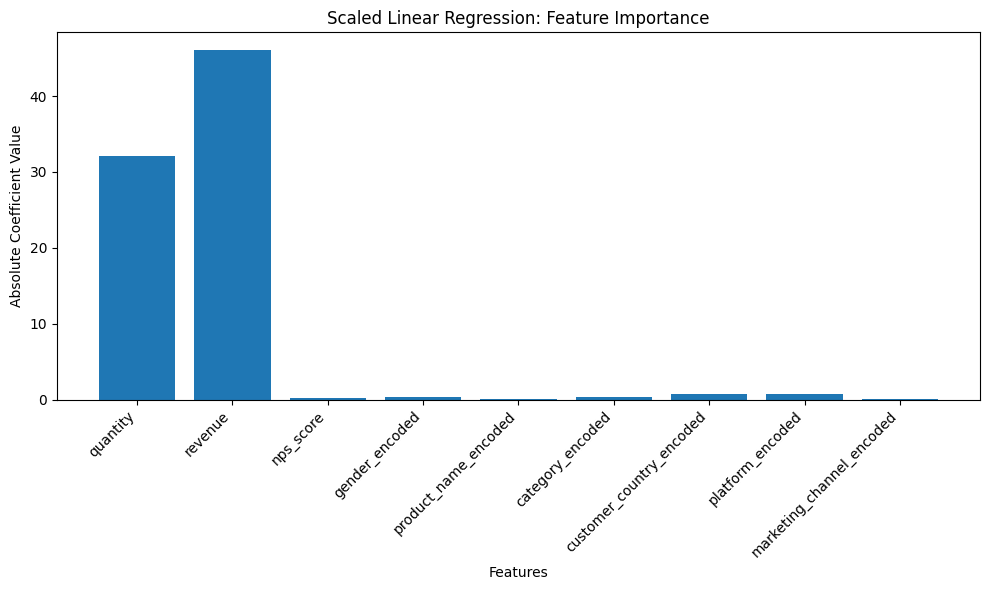

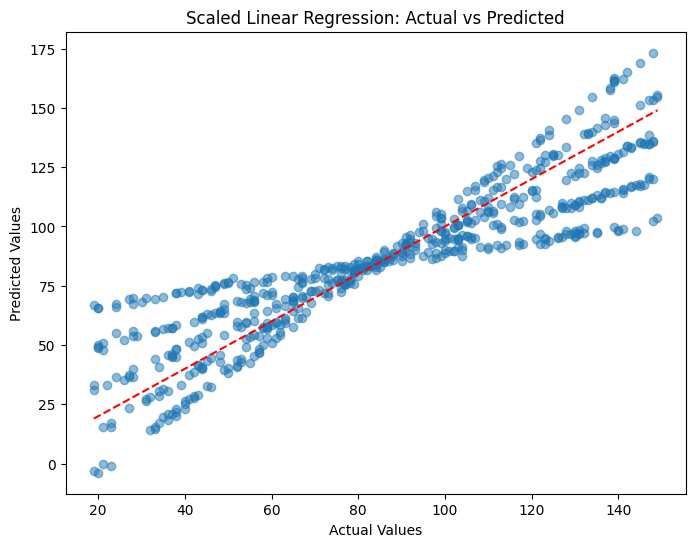


=== Feature Selection (SelectKBest) ===
MSE test set: 254.1284
MSE train set: 253.1121

R² Score test: 0.8172
R² Score train: 0.8232

MAE test set: 12.0401
MAE train set: 11.7717

Selected Features Selector : ['quantity' 'revenue' 'product_name_encoded' 'category_encoded'
 'customer_country_encoded']


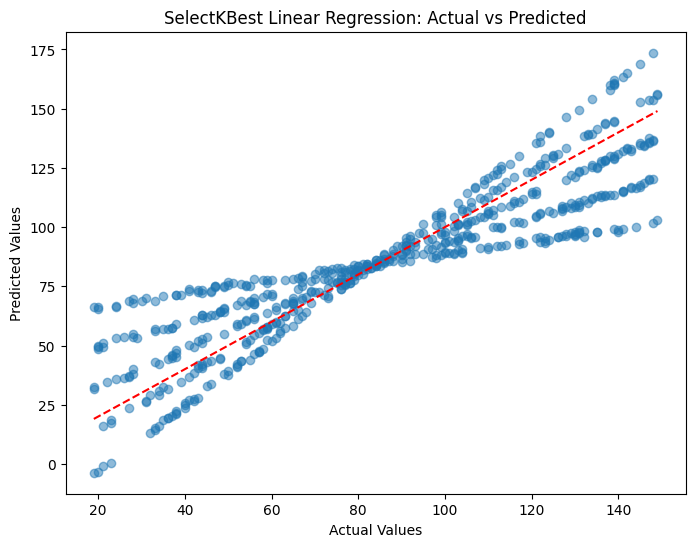


=== Feature Selection (RFE) ===
MSE test set: 255.0763
MSE train set: 252.5857

R² Score test: 0.8165
R² Score train: 0.8236

MAE test set: 12.0888
MAE train set: 11.7623

Selected Features Selector : ['quantity' 'revenue' 'gender_encoded' 'customer_country_encoded'
 'platform_encoded']


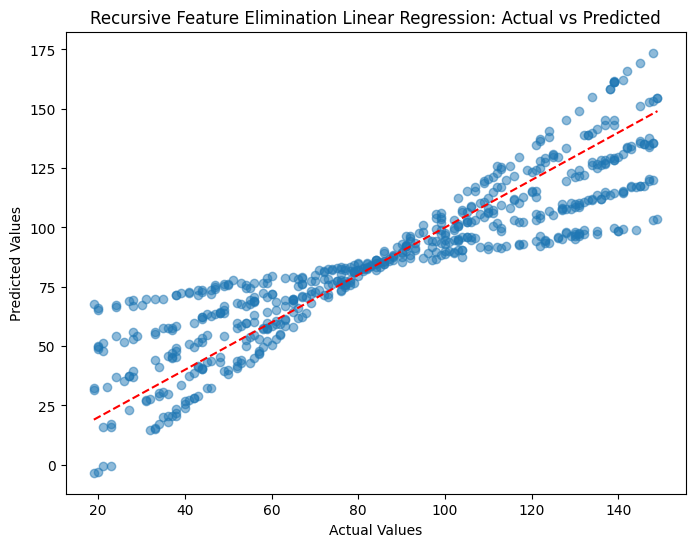


=== Polynomial Regression ===
MSE test set: 58.8401
MSE train set: 59.8476

R² Score test: 0.9577
R² Score train: 0.9582

MAE test set: 5.3887
MAE train set: 5.4098



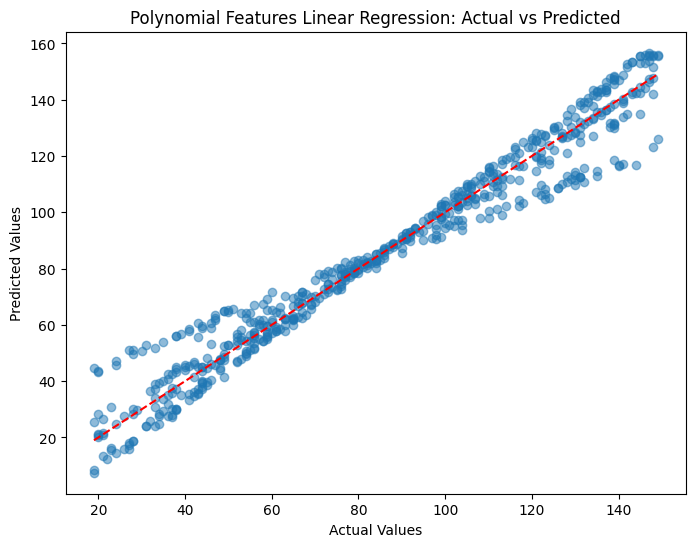


=== Ridge Regression ===
MSE test set:  255.3107
MSE train set: 252.4106

R² Score test: 0.8163
R² Score train:0.8237

MAE test set:  12.0828
MAE train set: 11.7559

Best alpha:    1.0000

Selected Features Coef_: ['quantity' 'revenue' 'nps_score' 'gender_encoded' 'product_name_encoded'
 'category_encoded' 'customer_country_encoded' 'platform_encoded'
 'marketing_channel_encoded']


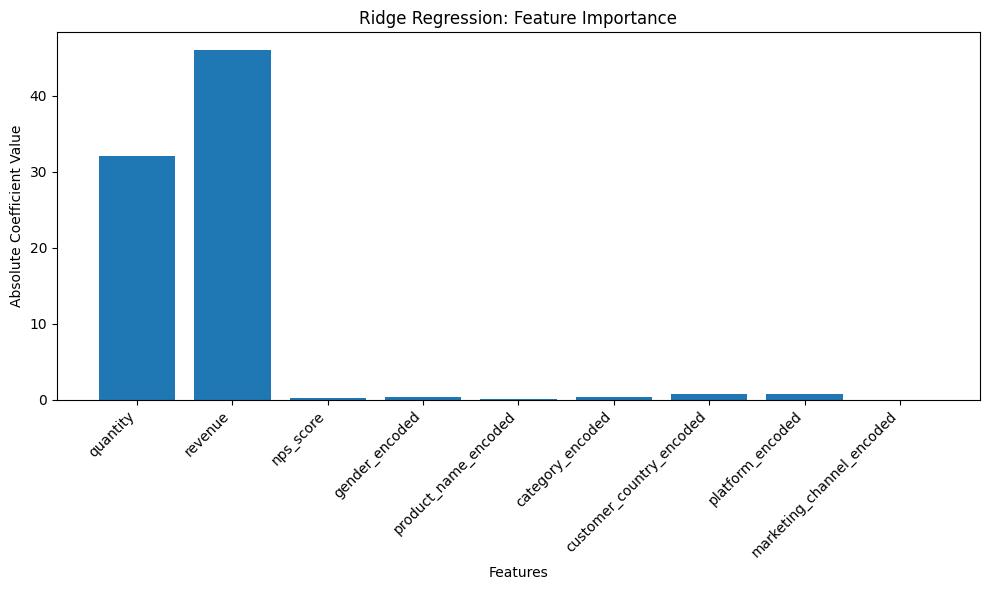

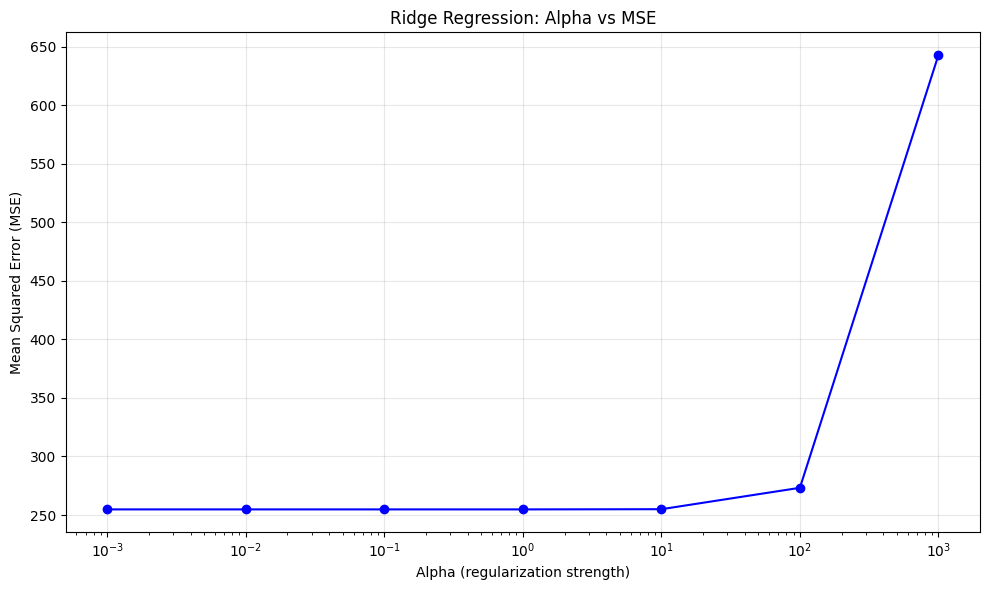


=== Lasso Regression ===
MSE test set: 255.4267
MSE train set: 252.5322

R² Score test: 0.8162
R² Score train: 0.8236

MAE test set: 12.0561
MAE train set: 11.7291

Best alpha: 0.1

Selected features: ['quantity' 'revenue' 'nps_score' 'gender_encoded' 'product_name_encoded'
 'category_encoded' 'customer_country_encoded' 'platform_encoded']


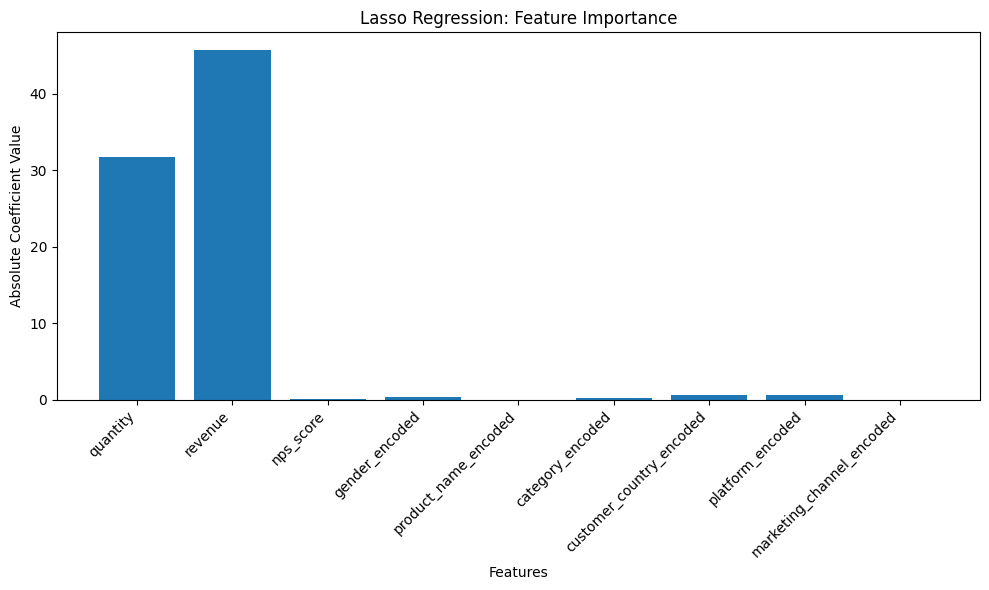


=== Elastic Net Regression ===
MSE test set: 255.7615
MSE train set: 252.5855

R² Score test: 0.8160
R² Score train: 0.8236

MAE test set: 12.0536
MAE train set: 11.7177

Best parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.99}

Selected Features Coef_: ['quantity' 'revenue' 'nps_score' 'gender_encoded' 'category_encoded'
 'customer_country_encoded' 'platform_encoded']


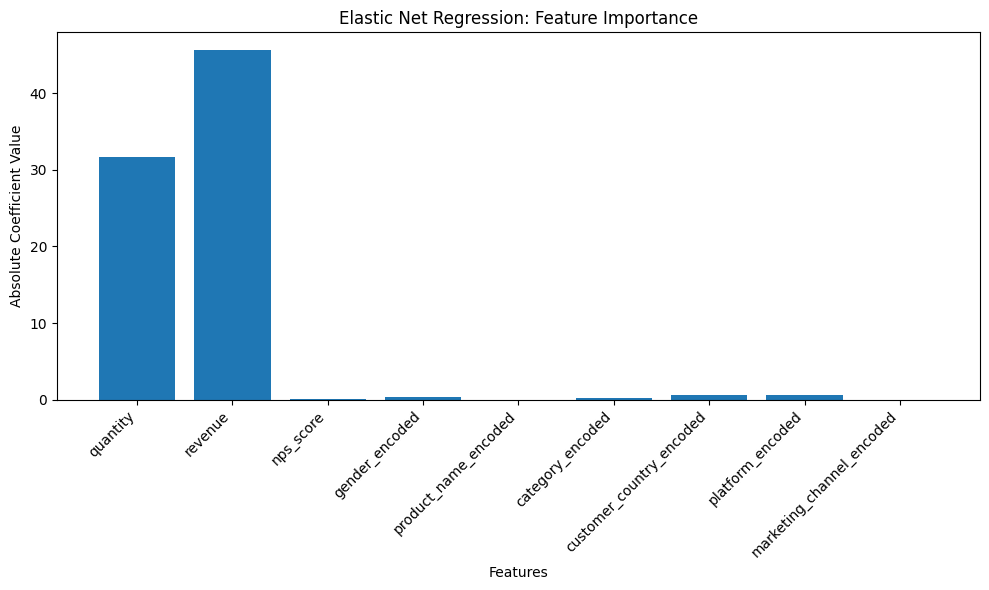

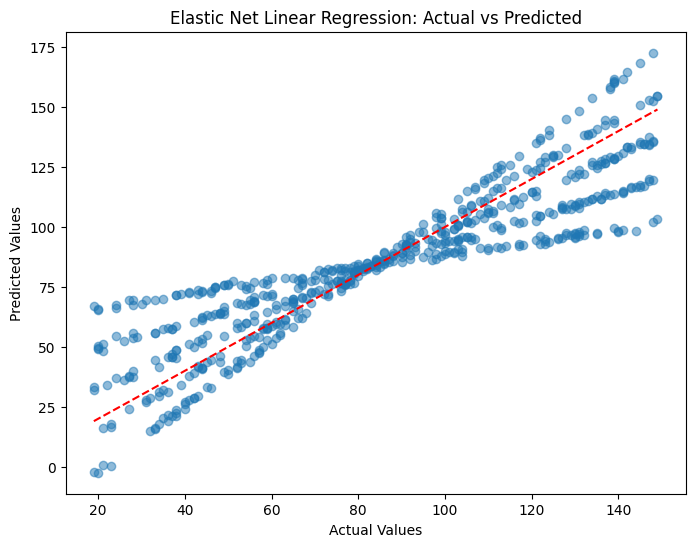


=== Model Comparison ===
                                  MSE        R²        MAE
Polynomial Regression       58.840076  0.957671   5.388707
Feature Selection (KBest)  254.128392  0.817182  12.040095
Feature Selection (RFE)    255.076347  0.816500  12.088841
Basic Linear Regression    255.188069  0.816419  12.083994
Scaled Linear Regression   255.188069  0.816419  12.083994
Ridge Regression           255.310714  0.816331  12.082829
Lasso Regression           255.426706  0.816248  12.056122
Elastic Net                255.761524  0.816007  12.053570


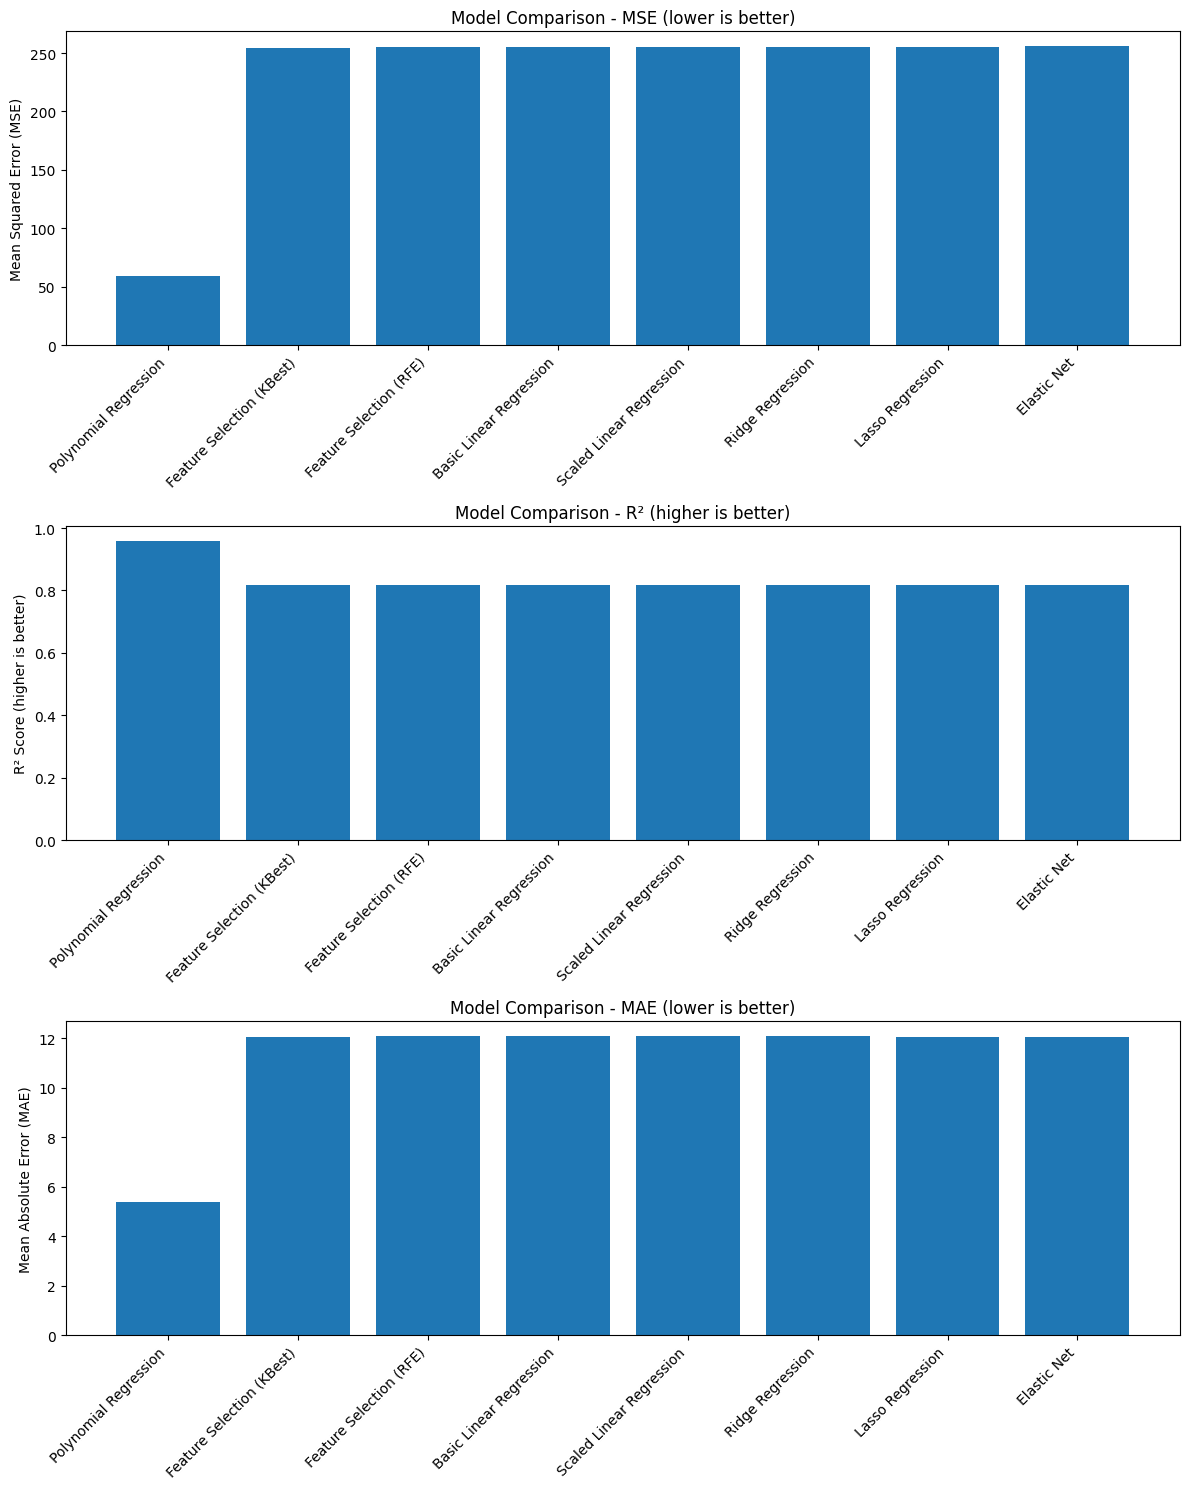

Best model according to MSE: Polynomial Regression
Best model according to R2_score: Polynomial Regression
Best model according to MAE: Polynomial Regression


In [43]:
# Basic Linear Regression model
def basic_linear_regression():
    print("\n=== Basic Linear Regression ===")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n") 
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)

    # Check which features were selected (non-zero coefficients)
    lr_coef = model.coef_
    selected_features = np.array(X_train.columns)[lr_coef != 0]
    print(f"\nSelected features: {selected_features}")
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.show()

    return model, mse_test, r2_test, mae_test

# Feature Scaling
def scaled_linear_regression():
    print("\n=== Scaled Linear Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}") 
    
    # Check which features were selected (non-zero coefficients)
    scaled_lr_coef = pipeline.named_steps['regression'].coef_
    selected_features = np.array(X_train.columns)[scaled_lr_coef != 0]
    print(f"Selected Features Coef_: {selected_features}") 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(scaled_lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Scaled Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scaled Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with SelectKBest
def feature_selection_kbest():
    print("\n=== Feature Selection (SelectKBest) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_regression, k=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}")
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('SelectKBest Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with Recursive Feature Elimination (RFE)
def feature_selection_rfe():
    print("\n=== Feature Selection (RFE) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', RFE(LinearRegression(), n_features_to_select=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}") 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Recursive Feature Elimination Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Polynomial Features
def polynomial_regression():
    print("\n=== Polynomial Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Polynomial Features Linear Regression: Actual vs Predicted')
    plt.show()  
    
    return pipeline, mse_test, r2_test, mae_test

# Regularized Linear Regression - Ridge
def ridge_regression():
    print("\n=== Ridge Regression ===")
    param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set:  {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train:{r2_train:.4f}\n")
    print(f"MAE test set:  {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    print(f"Best alpha:    {grid_search.best_params_['ridge__alpha']:.4f}")

    # Check which features were selected (non-zero coefficients)
    ridge_lr_coef = grid_search.best_estimator_['ridge'].coef_
    selected_features = np.array(X_train.columns)[ridge_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(ridge_lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Ridge Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize alpha vs MSE
    plt.figure(figsize=(10, 6))
    results = pd.DataFrame(grid_search.cv_results_)
    alphas = np.array(param_grid['ridge__alpha'])
    scores = -results['mean_test_score']
    plt.semilogx(alphas, scores, 'b-o')
    plt.xlabel('Alpha (regularization strength)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Ridge Regression: Alpha vs MSE')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Regularized Linear Regression - Lasso
def lasso_regression():
    print("\n=== Lasso Regression ===")
    param_grid = {'lasso__alpha': np.logspace(-3, 1, 5)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")    
    print(f"Best alpha: {grid_search.best_params_['lasso__alpha']}\n")
    
    # Check which features were selected (non-zero coefficients)
    lasso_coef = best_model.named_steps['lasso'].coef_
    selected_features = np.array(X_train.columns)[lasso_coef != 0]
    print(f"Selected features: {selected_features}")
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lasso_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Lasso Regression: Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Elastic Net
def elastic_net_regression():
    print("\n=== Elastic Net Regression ===")
    param_grid = {
        'elasticnet__alpha': np.logspace(-3, 1, 5),
        'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")   
    print(f"Best parameters: {grid_search.best_params_}\n")

    # Check which features were selected (non-zero coefficients)
    elastic_lr_coef = grid_search.best_estimator_['elasticnet'].coef_
    selected_features = np.array(X_train.columns)[elastic_lr_coef != 0]
    print(f"Selected Features Coef_: {selected_features}")
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(elastic_lr_coef))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Elastic Net Regression: Feature Importance')
    plt.tight_layout()
    plt.show()  
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Elastic Net Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return best_model, mse_test, r2_test, mae_test

# Cross-validation with MAE, MSE, and R² scores
def cross_validation_example():
    print("\n=== Cross-Validation ===")
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate different metrics
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")
    print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"Cross-Validation R²:  {r2_scores.mean():.4f} ±  {r2_scores.std():.4f}")
    
    return mse_scores, mae_scores, r2_scores
        
# Compare all models
def compare_models():
    models = {
        'Basic Linear Regression': basic_linear_regression(),
        'Scaled Linear Regression': scaled_linear_regression(),
        'Feature Selection (KBest)': feature_selection_kbest(),
        'Feature Selection (RFE)': feature_selection_rfe(),
        'Polynomial Regression': polynomial_regression(),
        'Ridge Regression': ridge_regression(),
        'Lasso Regression': lasso_regression(),
        'Elastic Net': elastic_net_regression()
    }
    
    # Extract MSE and R² scores
    results = {name: {'MSE': mse_scores, 'R²': r2_scores, 'MAE': mae_scores} for name, (_, mse_scores, r2_scores, mae_scores) in models.items()}
    results_df = pd.DataFrame(results).T
    
    # Sort by MSE (lower is better)
    results_df = results_df.sort_values('MSE')
    
    print("\n=== Model Comparison ===")
    print(results_df)

    # Plot comparison
    plt.figure(figsize=(12, 15))  # Increase height for 3 subplots
    
    plt.subplot(3, 1, 1)  # Change to 3 rows
    plt.bar(results_df.index, results_df['MSE'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Model Comparison - MSE (lower is better)')
    
    plt.subplot(3, 1, 2)  # Change to 3 rows
    plt.bar(results_df.index, results_df['R²'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² (higher is better)')

    plt.subplot(3, 1, 3)  # This now works with 3 rows
    plt.bar(results_df.index, results_df['MAE'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Model Comparison - MAE (lower is better)')

    plt.tight_layout()
    plt.show()

    return results_df 
    
# Feature Correlation Analysis
def feature_correlation_analysis():
    print("\n=== Feature Correlation Analysis ===")
    X_df = pd.DataFrame(df, columns=X_train.columns)
    X_df['price'] = y_train
    
    corr = X_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Sort features by correlation with target
    target_corr = corr['price'].sort_values(ascending=False)
    print("Feature correlation with target (price):")
    print(target_corr)
    
    return corr

# Main execution
if __name__ == "__main__":
    print("=== Linear Regression Tuning Examples ===")
    feature_correlation_analysis()
    cross_validation_example()
    results = compare_models()
    
    print(f"Best model according to MSE: {results.index[0]}")
    print(f"Best model according to R2_score: {results.index[0]}")
    print(f"Best model according to MAE: {results.index[0]}")

In [ ]:
print(f"The best model for Digital Sales Dataset was {results.index[0]} with a Mean Squared Error of {results.iloc[0]['MSE']}") 

## ElasticNet

In [46]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different alpha and l1_ratio combinations
alphas = [0.01, 0.1, 1.0, 10.0]
l1_ratios = [0.1, 0.5, 0.7, 0.9]

results = []
for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({
            'alpha': alpha,
            'l1_ratio': l1_ratio,
            'mse': mse,
            'r2': r2,
            'n_nonzero': np.sum(model.coef_ != 0)
        })

# Find best parameters
results_df = pd.DataFrame(results)
best_params = results_df.loc[results_df['mse'].idxmin()]
print("Best parameters:", best_params)

Best parameters: alpha          0.010000
l1_ratio       0.900000
mse          255.509781
r2             0.816188
n_nonzero      9.000000
Name: 3, dtype: float64


In [39]:
df.head()

,price,quantity,revenue,nps_score,gender_encoded,product_name_encoded,category_encoded,customer_country_encoded,platform_encoded,marketing_channel_encoded
0,128,1,128,3,5,8,5,129,0,1
1,32,5,160,6,5,1,2,70,1,1
2,27,1,27,3,2,3,5,64,3,4
3,147,3,441,1,2,4,0,20,1,7
4,88,1,88,4,5,3,1,128,5,0
